In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Объявляем наши константы

COUNT_VAR_IMG = 2000 # т.е. всего у нас будет 20 тысяч изображений
IMG_HIGH = 32
IMG_WEIGTH = 32
IMG_COLOR_NUMBER = 3

In [4]:
# Создаем наш 4D-массив. Назовем его Tensor_4D
Tensor_4D = np.zeros((COUNT_VAR_IMG, IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER),)

print(Tensor_4D.shape)

(2000, 32, 32, 3)


In [5]:
# Создаем наш 2D-массив с метками классов (10 - это количество классов)
Labels = np.zeros((COUNT_VAR_IMG,),)
print(Labels.shape)

(2000,)


In [6]:
# Считываем  из файла ".txt" наш тензор

f = open('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/data_set_real_data.txt', 'r')

for s in range(COUNT_VAR_IMG):
    for i in range(IMG_HIGH):
        for j in range(IMG_WEIGTH):
            for c in range(IMG_COLOR_NUMBER):
                Tensor_4D[s][i][j][c] = np.float(f.readline())

f.close()


In [7]:
# Считаем метки из файл формата .txt
f = open('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/data_set_real_labels.txt', 'r')

for s in range(COUNT_VAR_IMG):
    Labels[s] = np.float(f.readline())

f.close()

In [8]:
# Т.к. у нас есть только тестовый набор данных, то нужно воспользоваться библиотекой sklearn для разбиения одного набора данных на обучающий и тестовый

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Tensor_4D, Labels, test_size = 0.25)


In [9]:
# Исправление типа данных на те, которые ожидает Keras (floatx)
from keras import backend as keras_backend
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

In [10]:
# Необходимо провести масштабирование (нормализацию) наших данных

# Масштабирование наших пикселей из [0,255] в [-1,1]
X_train = np.interp(X_train, [0,255], [-1,1])
X_test = np.interp(X_test, [0,255], [-1,1])

# Необходимо узнать сколько у нас всего классов (хоть мы и знаем, что их 10, лучше делать следующим образом)
number_of_classes = 1 + max(np.append(y_train, y_test))

# Сохранение оригинальных y_train и y_test
original_y_train = y_train
original_y_test = y_test

# Кодирование каждого списка в массивы индивидуальных параметров
from keras.utils import to_categorical
y_train = to_categorical (y_train, num_classes = int(number_of_classes))
y_test = to_categorical (y_test, num_classes = int(number_of_classes))


# Теперь наши данные готовы к отправле в CNN Keras

In [11]:
# Нам необходимо построить модель нашей CNN

from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.python.keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


# Напишем функцию построения нашей модели CNN Keras
def make_bigger_cnn_model():
  model = Sequential()
  model.add(Conv2D(16,(5,5), activation = 'relu', padding = 'same', kernel_constraint = maxnorm(3), input_shape = (IMG_HIGH,IMG_WEIGTH,IMG_COLOR_NUMBER)))
  model.add(Dropout(0.2))
  model.add(Conv2D(8,(3,3), activation = 'relu', padding = 'same', kernel_constraint = maxnorm(3)))
  model.add(Dropout(0.2))
  model.add(Conv2D(8,(3,3), activation = 'relu', padding = 'same', kernel_constraint = maxnorm(3)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(number_of_classes,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model

# Напишем другую функцию построения модели MLP
def make_simple_cnn_model():
  model = Sequential()
  model.add(Conv2D(32,(5,5), activation = 'relu', padding = 'same', kernel_constraint = maxnorm(3), input_shape = (IMG_HIGH,IMG_WEIGTH,IMG_COLOR_NUMBER)))
  model.add(Flatten())
  model.add(Dense(number_of_classes,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model


# Вызываем нашу функцию создания модели
bigger_cnn_model = make_simple_cnn_model()  


In [12]:
# Начинаем тренировать модель
bigger_cnn_history = bigger_cnn_model.fit(X_train,y_train, validation_data = (X_test, y_test), epochs=10, batch_size = 32, verbose = 1)

Epoch 1/10
47/47 [==============================] - 1s 11ms/step - loss: 0.2742 - accuracy: 0.8993 - val_loss: 0.0504 - val_accuracy: 0.9900
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0568 - accuracy: 0.9847 - val_loss: 0.0398 - val_accuracy: 0.9920
Epoch 3/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0417 - accuracy: 0.9893 - val_loss: 0.0389 - val_accuracy: 0.9940
Epoch 4/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0338 - accuracy: 0.9927 - val_loss: 0.0521 - val_accuracy: 0.9860
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0290 - accuracy: 0.9940 - val_loss: 0.0375 - val_accuracy: 0.9860
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.0403 - val_accuracy: 0.9920
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0423 - val_accuracy: 0.9900
Epoch 8/10
47/47 [=

In [13]:
results = bigger_cnn_model.evaluate(X_test, y_test, batch_size=32)
print('Evaluate on fake "2" and "3" --> Loss, Accuracy:', results)

16/16 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9900
Evaluate on fake "2" and "3" --> Loss, Accuracy: [0.03814179077744484, 0.9900000095367432]


In [14]:
# Сохраняем весов обученной сети
bigger_cnn_model.save_weights('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/my_model_weigths.h5')

# Сохранение архитектруы сети
import yaml
filename = '/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/my_model_arch.yaml'
yaml_string = bigger_cnn_model.to_yaml()
with open(filename, 'w') as outfile:
  yaml.dump(yaml_string, outfile)

# Сохраняем сеть полностью (и веса, и архитектруа в одном файле)
bigger_cnn_model.save('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/my_model.h5')  

[0.8993333578109741, 0.984666645526886, 0.9893333315849304, 0.9926666617393494, 0.9940000176429749, 0.9933333396911621, 0.9933333396911621, 0.9933333396911621, 0.9973333477973938, 0.9986666440963745]


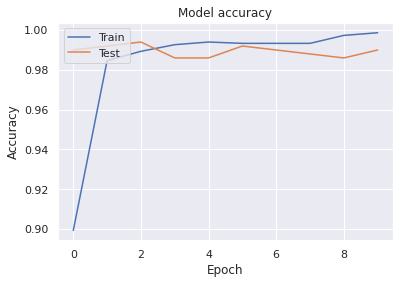

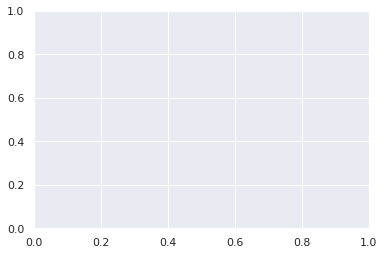

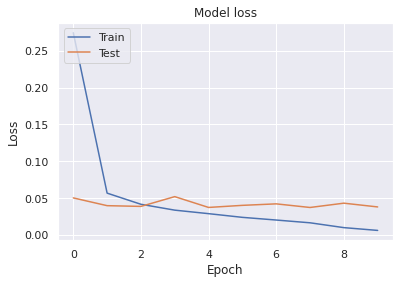

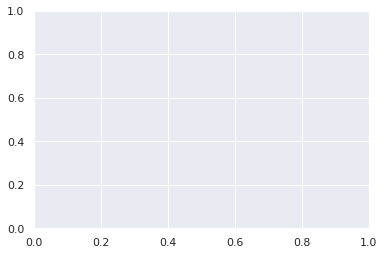

In [15]:
# Визуализация процесса обучения

# Сохраним внешний вид нашей модели в файл ".png"
from tensorflow.keras.utils import plot_model
plot_model(bigger_cnn_model, to_file='/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/model.png')

print(bigger_cnn_history.history['accuracy'])

# Plot training & validation accuracy values
plt.plot(bigger_cnn_history.history['accuracy'])
plt.plot(bigger_cnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

fig, ax = plt.subplots()
fig.savefig('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/accuracy_img.png')

plt.show()




# Plot training & validation loss values
plt.plot(bigger_cnn_history.history['loss'])
plt.plot(bigger_cnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

fig, ax = plt.subplots()
fig.savefig('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/loss_img.png')

plt.show()


In [16]:
# Добавим предсказание

test = bigger_cnn_model.predict(X_test[28:30],verbose = 1)
print(test)
print(original_y_test[28:30])

1/1 [==============================] - 0s 4ms/step
[[9.9961424e-01 3.8572590e-04]
 [3.2921253e-06 9.9999666e-01]]
[0. 1.]


In [17]:
# Добавим вообще нарисованную нами цифру, вообще не из набора MNIST, на котором мы тренировали, а из оригинального набора MNIST

# Считываем  из файла ".jpg" наш тензор-изображение
import cv2

image_name = '0_1.jpg'

imgorig = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/' + image_name, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB) # Это и есть одна выборка

# Даем ему форму Tensor-4D (т.к. функция predict() нашей натренированной модели принимает именно его на вход)
rgb_img = rgb_img.reshape(1,IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER)

# Проверяем размерность
print(rgb_img.shape)

# Производим ту же самую предобработку, что и с тренировочным набором
rgb_img = keras_backend.cast_to_floatx(rgb_img)
rgb_img = np.interp(rgb_img, [0,255], [-1,1])

test_our_image = bigger_cnn_model.predict_classes(rgb_img,verbose = 1)
print('Our predict on (0_1.jpg) = ', test_our_image[0])


image_name = '0_2.jpg'

imgorig = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/' + image_name, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB) # Это и есть одна выборка

# Даем ему форму Tensor-4D (т.к. функция predict() нашей натренированной модели принимает именно его на вход)
rgb_img = rgb_img.reshape(1,IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER)

# Проверяем размерность
print(rgb_img.shape)

# Производим ту же самую предобработку, что и с тренировочным набором
rgb_img = keras_backend.cast_to_floatx(rgb_img)
rgb_img = np.interp(rgb_img, [0,255], [-1,1])

test_our_image = bigger_cnn_model.predict_classes(rgb_img,verbose = 1)
print('Our predict on (0_2.jpg) = ', test_our_image[0])






image_name = '0_3.jpg'

imgorig = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/' + image_name, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB) # Это и есть одна выборка

# Даем ему форму Tensor-4D (т.к. функция predict() нашей натренированной модели принимает именно его на вход)
rgb_img = rgb_img.reshape(1,IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER)

# Проверяем размерность
print(rgb_img.shape)

# Производим ту же самую предобработку, что и с тренировочным набором
rgb_img = keras_backend.cast_to_floatx(rgb_img)
rgb_img = np.interp(rgb_img, [0,255], [-1,1])

test_our_image = bigger_cnn_model.predict_classes(rgb_img,verbose = 1)
print('Our predict on (0_3.jpg) = ', test_our_image[0])







image_name = '1_1.jpg'

imgorig = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/' + image_name, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB) # Это и есть одна выборка

# Даем ему форму Tensor-4D (т.к. функция predict() нашей натренированной модели принимает именно его на вход)
rgb_img = rgb_img.reshape(1,IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER)

# Проверяем размерность
print(rgb_img.shape)

# Производим ту же самую предобработку, что и с тренировочным набором
rgb_img = keras_backend.cast_to_floatx(rgb_img)
rgb_img = np.interp(rgb_img, [0,255], [-1,1])

test_our_image = bigger_cnn_model.predict_classes(rgb_img,verbose = 1)
print('Our predict on (1_1.jpg) =  = ', test_our_image[0])




image_name = '1_2.jpg'

imgorig = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/' + image_name, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB) # Это и есть одна выборка

# Даем ему форму Tensor-4D (т.к. функция predict() нашей натренированной модели принимает именно его на вход)
rgb_img = rgb_img.reshape(1,IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER)

# Проверяем размерность
print(rgb_img.shape)

# Производим ту же самую предобработку, что и с тренировочным набором
rgb_img = keras_backend.cast_to_floatx(rgb_img)
rgb_img = np.interp(rgb_img, [0,255], [-1,1])

test_our_image = bigger_cnn_model.predict_classes(rgb_img,verbose = 1)
print('Our predict on (1_2.jpg) = ', test_our_image[0])






image_name = '1_3.jpg'

imgorig = cv2.imread('/content/drive/My Drive/Colab Notebooks/datasets/turn_mnist_gen/' + image_name, cv2.IMREAD_COLOR)
rgb_img = cv2.cvtColor(imgorig, cv2.COLOR_BGR2RGB) # Это и есть одна выборка

# Даем ему форму Tensor-4D (т.к. функция predict() нашей натренированной модели принимает именно его на вход)
rgb_img = rgb_img.reshape(1,IMG_HIGH, IMG_WEIGTH, IMG_COLOR_NUMBER)

# Проверяем размерность
print(rgb_img.shape)

# Производим ту же самую предобработку, что и с тренировочным набором
rgb_img = keras_backend.cast_to_floatx(rgb_img)
rgb_img = np.interp(rgb_img, [0,255], [-1,1])

test_our_image = bigger_cnn_model.predict_classes(rgb_img,verbose = 1)
print('Our predict on (1_3.jpg) = ', test_our_image[0])



(1, 32, 32, 3)
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1/1 [==============================] - 0s 4ms/step
Our predict on (0_1.jpg) =  0
(1, 32, 32, 3)
1/1 [==============================] - 0s 2ms/step
Our predict on (0_2.jpg) =  0
(1, 32, 32, 3)
1/1 [==============================] - 0s 1ms/step
Our predict on (0_3.jpg) =  0
(1, 32, 32, 3)
1/1 [==============================] - 0s 4ms/step
Our predict on (1_1.jpg) =  =  1
(1, 32, 32, 3)
1/1 [==============================] - 0s 2ms/step
Our predict on (1_2.jpg) =  0
(1, 32, 32, 3)
1/1 [==============================] - 0s 2ms/step
Our predict on (1_3.jpg) =  1


In [18]:
print("\nРабота программы завершена.\n")


Работа программы завершена.

